In [86]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score 
from sklearn.metrics import mean_squared_error

In [55]:
data = pd.read_csv('Uber.csv');

In [56]:
data.head()

,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,24238194,2015-05-07 19:52:06.0000003,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1
1,27835199,2009-07-17 20:04:56.0000002,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1
2,44984355,2009-08-24 21:45:00.00000061,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1
3,25894730,2009-06-26 08:22:21.0000001,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3
4,17610152,2014-08-28 17:47:00.000000188,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5


In [57]:
data.shape

(200000, 9)

In [58]:
data["pickup_datetime"] = pd.to_datetime(data["pickup_datetime"]);

In [59]:
missing_values = data.isnull().sum()
print('Missing Valuesin dataset :');
print(missing_values)

Missing Valuesin dataset :
Unnamed: 0           0
key                  0
fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    1
dropoff_latitude     1
passenger_count      0
dtype: int64


In [60]:
data.dropna()

,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,24238194,2015-05-07 19:52:06.0000003,7.5,2015-05-07 19:52:06+00:00,-73.999817,40.738354,-73.999512,40.723217,1
1,27835199,2009-07-17 20:04:56.0000002,7.7,2009-07-17 20:04:56+00:00,-73.994355,40.728225,-73.994710,40.750325,1
2,44984355,2009-08-24 21:45:00.00000061,12.9,2009-08-24 21:45:00+00:00,-74.005043,40.740770,-73.962565,40.772647,1
3,25894730,2009-06-26 08:22:21.0000001,5.3,2009-06-26 08:22:21+00:00,-73.976124,40.790844,-73.965316,40.803349,3
4,17610152,2014-08-28 17:47:00.000000188,16.0,2014-08-28 17:47:00+00:00,-73.925023,40.744085,-73.973082,40.761247,5
...,...,...,...,...,...,...,...,...,...
199995,42598914,2012-10-28 10:49:00.00000053,3.0,2012-10-28 10:49:00+00:00,-73.987042,40.739367,-73.986525,40.740297,1
199996,16382965,2014-03-14 01:09:00.0000008,7.5,2014-03-14 01:09:00+00:00,-73.984722,40.736837,-74.006672,40.739620,1
199997,27804658,2009-06-29 00:42:00.00000078,30.9,2009-06-29 00:42:00+00:00,-73.986017,40.756487,-73.858957,40.692588,2
199998,20259894,2015-05-20 14:56:25.0000004,14.5,2015-05-20 14:56:25+00:00,-73.997124,40.725452,-73.983215,40.695415,1


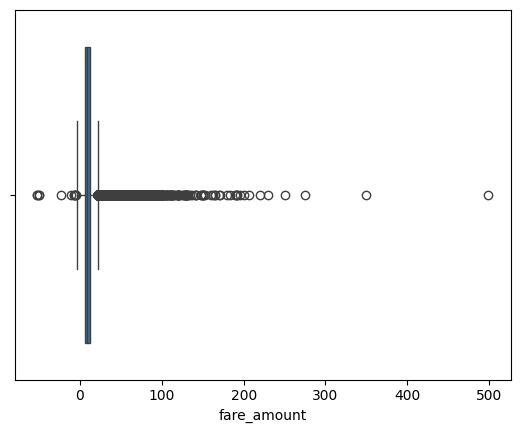

In [61]:
sns.boxplot(x=data["fare_amount"])
plt.show()

In [62]:
Q1 = data["fare_amount"].quantile(0.25)
Q3 = data["fare_amount"].quantile(0.75)
IQR = Q3-Q1
threshold = 1.5
lb = Q1 - threshold * IQR 
up = Q3 + threshold * IQR 
data_no_out = data[(data["fare_amount"]>=lb) & (data["fare_amount"]<=up)];
data_no_out

,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,24238194,2015-05-07 19:52:06.0000003,7.5,2015-05-07 19:52:06+00:00,-73.999817,40.738354,-73.999512,40.723217,1
1,27835199,2009-07-17 20:04:56.0000002,7.7,2009-07-17 20:04:56+00:00,-73.994355,40.728225,-73.994710,40.750325,1
2,44984355,2009-08-24 21:45:00.00000061,12.9,2009-08-24 21:45:00+00:00,-74.005043,40.740770,-73.962565,40.772647,1
3,25894730,2009-06-26 08:22:21.0000001,5.3,2009-06-26 08:22:21+00:00,-73.976124,40.790844,-73.965316,40.803349,3
4,17610152,2014-08-28 17:47:00.000000188,16.0,2014-08-28 17:47:00+00:00,-73.925023,40.744085,-73.973082,40.761247,5
...,...,...,...,...,...,...,...,...,...
199994,3189201,2014-01-31 14:42:00.000000181,12.0,2014-01-31 14:42:00+00:00,-73.983070,40.760770,-73.972972,40.754177,1
199995,42598914,2012-10-28 10:49:00.00000053,3.0,2012-10-28 10:49:00+00:00,-73.987042,40.739367,-73.986525,40.740297,1
199996,16382965,2014-03-14 01:09:00.0000008,7.5,2014-03-14 01:09:00+00:00,-73.984722,40.736837,-74.006672,40.739620,1
199998,20259894,2015-05-20 14:56:25.0000004,14.5,2015-05-20 14:56:25+00:00,-73.997124,40.725452,-73.983215,40.695415,1


<Axes: xlabel='fare_amount'>

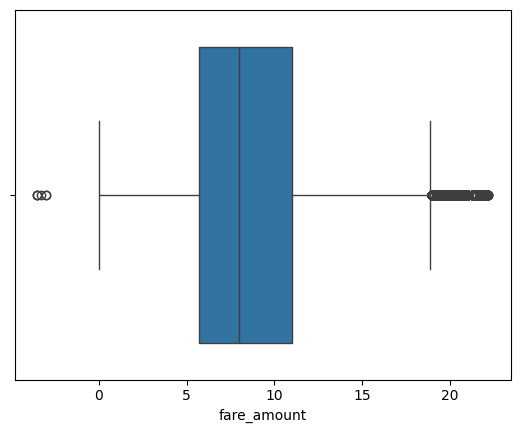

In [63]:
sns.boxplot(x = data_no_out["fare_amount"]) 

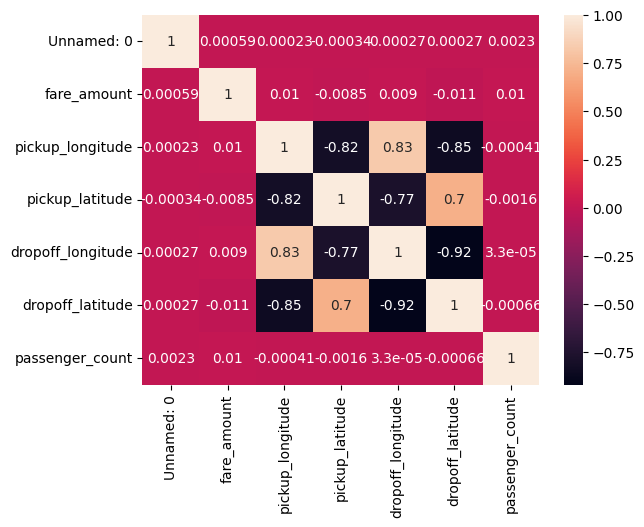

In [64]:
num = data.select_dtypes(include=[np.number]);
corr_mat =  num.corr()
sns.heatmap(corr_mat,annot=True);
plt.show()

In [65]:
X = data_no_out[['pickup_longitude', 'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude', 'passenger_count']]
y = data_no_out['fare_amount']

X

,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,-73.999817,40.738354,-73.999512,40.723217,1
1,-73.994355,40.728225,-73.994710,40.750325,1
2,-74.005043,40.740770,-73.962565,40.772647,1
3,-73.976124,40.790844,-73.965316,40.803349,3
4,-73.925023,40.744085,-73.973082,40.761247,5
...,...,...,...,...,...
199994,-73.983070,40.760770,-73.972972,40.754177,1
199995,-73.987042,40.739367,-73.986525,40.740297,1
199996,-73.984722,40.736837,-74.006672,40.739620,1
199998,-73.997124,40.725452,-73.983215,40.695415,1


In [66]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [72]:
# Create and train the linear regression model
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

LinearRegression()

In [77]:
rf_model = RandomForestRegressor(n_estimators=100,random_state=0)
rf_model.fit(X_train,y_train);

In [81]:
y_pred_lr = lr_model.predict(X_test);
y_pred_lr

array([8.9092654 , 8.90920366, 8.90920456, ..., 9.12111117, 8.90927677,
       8.90927104])

In [82]:
y_pred_rf = lr_model.predict(X_test)
y_pred_rf

array([8.9092654 , 8.90920366, 8.90920456, ..., 9.12111117, 8.90927677,
       8.90927104])

In [87]:
r2_lr = r2_score(y_test,y_pred_lr);
rmse_lr = np.sqrt(mean_squared_error(y_test, y_pred_lr));

In [91]:
print("r2_score_lr:",r2_lr)

r2_score_lr: 8.29713376748753e-05


In [92]:
print("rmse_lr:",rmse_lr)

rmse_lr: 4.136624287486402


In [93]:
r2_rf = r2_score(y_test, y_pred_rf)
rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))

print("Random Forest Regression R2:", r2_rf)
print("Random Forest Regression RMSE:",rmse_rf)

Random Forest Regression R2: 8.29713376748753e-05
Random Forest Regression RMSE: 4.136624287486402
